# Classification using Logistic Regression & K-NN Classifier

### import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset

In [2]:
# from google.colab import files
# uploaded = files.upload()
# D8data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [3]:
data = pd.read_csv('D8data1.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## EDA

### count for Gender column

<Axes: xlabel='Purchased', ylabel='count'>

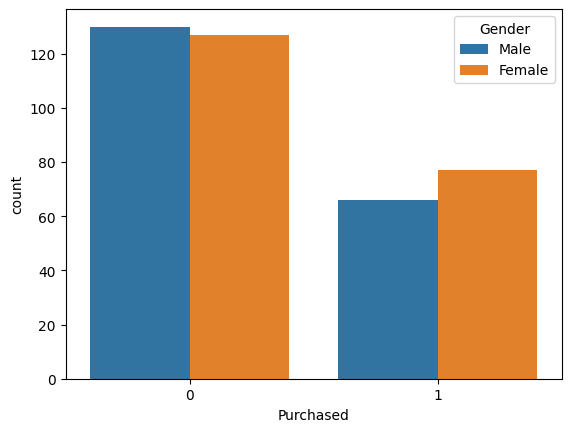

In [7]:
sns.countplot(x='Purchased', hue='Gender', data=data)

In [8]:
# alt for countplot
# sns.countplot(x=data['Purchased'], hue=data['Gender'])

### dist for Age column

c:\users\surya\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


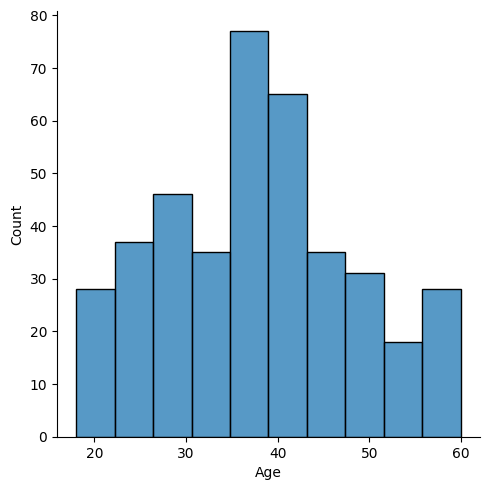

In [9]:
sns.displot(data['Age'])

C:\Users\surya\AppData\Local\Temp\ipykernel_27672\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

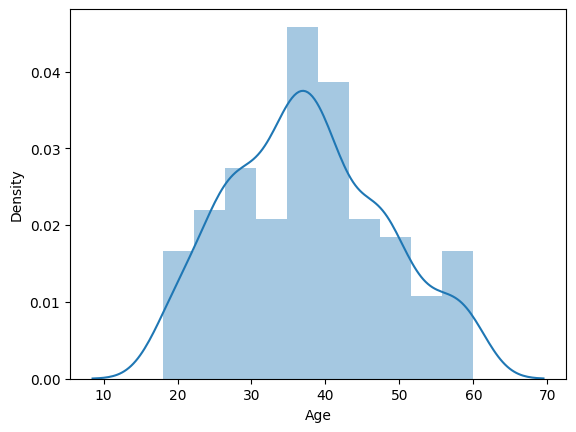

In [10]:
sns.distplot(data['Age'])

### dist for EstimatedSalary column

<Axes: ylabel='Density'>

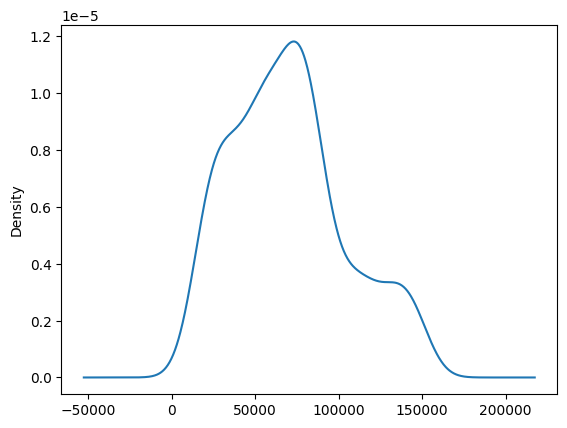

In [11]:
data['EstimatedSalary'].plot(kind='kde')
# kernel density plot

## identify X & Y

In [12]:
x = data[['Age', 'EstimatedSalary']]
x[:5]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [13]:
y = data['Purchased']
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Splitting

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [16]:
x_train.head()

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000


In [17]:
x_test.head()

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [18]:
x_train.describe()
# to get an idea of min & max for scaling values

,Age,EstimatedSalary
count,300.000000,300.000000
mean,38.126667,69583.333333
std,10.114592,34548.541619
min,18.000000,15000.000000
25%,30.750000,43000.000000
50%,38.000000,69500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


## Preprocessing

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)
x_train[:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [22]:
x_test = scaler.fit_transform(x_test)
x_test[:5]

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566]])

## Logistic Regression Classification

In [23]:
from sklearn.linear_model import LogisticRegression

### Modeling

In [24]:
model = LogisticRegression()

### Training

In [25]:
model.fit(x_train, y_train)

LogisticRegression()

### Prediction

In [26]:
prediction = model.predict(x_test)
# generating prediction
prediction[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation
- checking performance using evaluation metrics

#### confusion_matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test, prediction)

array([[63,  5],
       [ 8, 24]], dtype=int64)

#### classification_report

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



#### accuracy_score

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, prediction)

0.87

#### precision_score

In [33]:
from sklearn.metrics import precision_score

In [34]:
precision_score(y_test, prediction)

0.8275862068965517

#### recall_score

In [35]:
from sklearn.metrics import recall_score

In [36]:
recall_score(y_test, prediction)

0.75

## K-Nearest Neighbor (KNN) Classification


### Modeling

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=5)

### Training

In [39]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

### Prediction

In [40]:
knn_predictions = knn_model.predict(x_test)
knn_predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation

#### confusion_matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test, knn_predictions)

array([[64,  4],
       [ 3, 29]], dtype=int64)

#### classification_report

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



#### accuracy_score

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test, knn_predictions)

0.93

#### precision_score

In [47]:
from sklearn.metrics import precision_score

In [48]:
precision_score(y_test, knn_predictions)

0.8787878787878788

#### recall_score

In [49]:
from sklearn.metrics import recall_score

In [50]:
recall_score(y_test, knn_predictions)

0.90625

# Observation Note
- Note that K-NN model has more accuracy than Logistic, so K-NN performs better than Logistic regression

# HW:
- conditional probability
- Bayes Theorem